
[Introduction](#Introduction)
* [1. Business Understanding](#1.-Business-Understanding)
* [2. Data Understanding](#2.-Data-Understanding)
* [3. Data Preparation](#3.-Data-Preparation)
* [4. Modeling & Evaluation](#4.-Modeling-&-Evaluation)

[Summary of Evaluations](#Summary-of-Evaluations)





## Introduction

AirBnB has become a very convenient and popular platform for travellers to find a short-term accommodation or renters to lease.

In this article I would like to take a close look at the data from the AirBnB service in Seattle in 2016.

This notebook follows CRISP-DM process to try to answer below questions from consideration to start lodging business in Seattle:

## 1. Business Understanding

### • Business Objective
Aim of this notebook is to conduct an initial study if it is worth to start lodging business in Seattle by studying past data from AirBnB.<br>
For this purpose, below questions will need to be answered:<br>
    • Traffic convenience and variety of entertainment are usually very important factors to consider where to start lodging business. Is it the same case in Seattle? <br>
    • Is there an obvious variation under seasonal factors ?<br>
    • Will it be easy to lease lodging in Seattle?<br>
    • What factors are determining leasing prices of lodgings?<br>
    
### • Data Mining Objective
    • Study the areas with high density of lodgings in Seattle, and features of infrastrutures/facilities nearby
    • Study the price distribution of lodgings in Seattle, and the variation of prices over the year
    • Check occupancy rate of lodgings in popular lodging areas.
    • Observe relationship between leasing prices and other parameters, and develop predictive model to help to judge price setting.
    


## 2. Data Understanding

### • Source of data: 
Dataset collected in this study is solely AirBnB dataset from Kaggle.<br>
There are 3 set of data in total:
- listings: data on attributes of lodgings including links, geographic coordinates, charges, rating, etc.
- reviews: comment from AirBnB users on the lodges
- calendar: price and availability information of lodges every day

### • Data Description:

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
%matplotlib inline
from datetime import datetime

from sklearn import preprocessing
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC

import folium
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix,f1_score, precision_score, recall_score
import random

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', 1000)

In [36]:
listing = pd.read_csv("/kaggle/input/seattle/listings.csv")
reviews = pd.read_csv("/kaggle/input/seattle/reviews.csv")
calendar = pd.read_csv("/kaggle/input/seattle/calendar.csv")

In [37]:
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [38]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [39]:
listing.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [40]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [41]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [42]:
#check for date range included in data set "reviews"
reviews['date'].min(),reviews['date'].max()

('2009-06-07', '2016-01-03')

In [43]:
reviews.shape[0]/reviews['listing_id'].nunique()

26.590097148229397

In [44]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [45]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [46]:
calendar.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


Subject to Data Objective, below columns will be used:<br>
- listing: <br>
"id": related id in AirBnB of the lodge<br>
"latitiude", "longitude": geographical coordinates of the lodge<br>
"price": averge leasing price of the lodge <br>
"neighbourhood":area where the lodge locates<br>
"host_listings_count","host_total_listings_count":number of lodges the host is holding<br>
"accommodates": suitability for number of accomodaters in the lodge<br>
"bathrooms","bedrooms","beds": corresponding number of facilities of the lodge<br>
"number_of_reviews": number of reviews on the lodge<br>
"review_scores_rating":average of review scores<br>


- calendar: <br>
"listing_id":corresponding id of lodging from dataset "listing"<br>
"date":date of leasing<br>
"available": availability for leasing on the date<br>
"price":leasing price of the date<br>

## 3. Data Preparation

Below will need to be ready below analysis of data:
- 1. conversion of below columns into numeric data:
    - listing['price']
    - calendar['price']
- 2. conversion of below columns into categorical data:
    - calendar['available']
    
- 3. list of top 10 neighbourhood with highest number of lodgings since it is interested to study popular area for lodgings
- 4. Map the column 'neighbourhood' from dataset 'listing' to dataset 'calendar' to study availability of each area
- 5. Form new dataframe by grouping lodges in top 10 neighbourhood with highest number of lodgings for the analysis of occupancy
- 6. For coefficient matrix and predictive model development, drop missing rows
- 7. Prepare data for prediction using supervised machine learning 

In [47]:
#1.&2.
def cleanser(df):
    """function to clean by converting 'price' into float and 'available' into 0/1:
    Input: dataframe for cleansing
    Output: dataframe after cleansing"""
    try:
        df['price'] = df['price'].str.strip("$")
        df['price'] = pd.to_numeric(df['price'].str.replace(",",""))
        df['available'] = df['available'].str.replace('t','1')
        df['available'] = df['available'].str.replace('f','0')
        df['available'] = pd.to_numeric(df['available'])
    except Exception as e: 
        print(e)
        pass
    
    return df
    

In [48]:
# remove "$" and "," under column "price" 
listing = cleanser(listing)
calendar = cleanser(calendar)


'available'


In [49]:
#3.
list_top_neighbourhood = listing.groupby(['neighbourhood'])['id'].count().sort_values(ascending=False).head(10)
list_top_neighbourhood

neighbourhood
Capitol Hill           351
Ballard                213
Belltown               204
Minor                  192
Queen Anne             187
Fremont                148
Wallingford            143
University District    107
First Hill             105
Stevens                 98
Name: id, dtype: int64

In [50]:
#4.
calendar = calendar.merge(listing[['id','neighbourhood']],left_on = 'listing_id', right_on='id')

In [51]:
#5
availability = calendar.groupby(['neighbourhood','listing_id'])['available'].sum()/calendar.groupby('listing_id')['available'].count()
availability = availability.reset_index()

In [52]:
#6
listing_test = listing[["host_listings_count","host_total_listings_count","accommodates",
"bathrooms","bedrooms","beds","number_of_reviews","review_scores_rating","longitude","latitude","price"]]
listing_test.dropna(inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [53]:
#check the reduction of size of data after dropping
listing.shape[0], listing_test.shape[0], 


(3818, 3153)

In [54]:
print('Percentage loss in data = {}'.format(1-listing_test.shape[0]/listing.shape[0]))
      

Percentage loss in data = 0.1741749607124149


We will accept around 20% drop in data in order to proceed further analysis on correlationship between columns and develop predictive model

In [55]:
#7 
X = listing_test.drop('price',axis=1)
y = listing_test['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42) 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

RescaledX=scaler.fit_transform(X)
#Rescaledy=scaler.transform(y)
X_train, X_test, y_train, y_test = train_test_split(RescaledX, y, test_size = .2, random_state=42) 

### Overview of data to be used to analysis

In [56]:
print("In the dataset 'listing',")
print("There are {} lodgings listed in AirBnB.".format(listing.shape[0]))
print("There are {} neighbourhood in Seattle.".format(listing['neighbourhood'].nunique()))
print("Regarding the sizes of lodgings, in avereage they are designed to room {} people.".format(listing['accommodates'].mean()))
print("Range of leasing price is between  ${} to ${} with median at ${}(mean at {}).".format(listing['price'].min(),listing['price'].max(),listing['price'].median(),listing['price'].mean()))
print("Ranges of number of reviews is from {} to {} with median at {}.".format(listing['number_of_reviews'].min(),listing['number_of_reviews'].max(),listing['number_of_reviews'].median()))
print("Ranges of review scores rating is from {} to {} with median at {}.".format(listing['review_scores_rating'].min(),listing['review_scores_rating'].max(),listing['review_scores_rating'].median()))
print("-----------------------------------------------------------------------------------------------")

print("In the dataset 'calendar',")
print("Date range is from {} to {}.".format(calendar['date'].min(),calendar['date'].max()))
print("Range of leasing price is between  ${} to ${} with median at ${}.".format(calendar['price'].min(),calendar['price'].max(),calendar['price'].median()))


In the dataset 'listing',
There are 3818 lodgings listed in AirBnB.
There are 81 neighbourhood in Seattle.
Regarding the sizes of lodgings, in avereage they are designed to room 3.3493975903614457 people.
Range of leasing price is between  $20.0 to $1000.0 with median at $100.0(mean at 127.97616553169199).
Ranges of number of reviews is from 0 to 474 with median at 9.0.
Ranges of review scores rating is from 20.0 to 100.0 with median at 96.0.
-----------------------------------------------------------------------------------------------
In the dataset 'calendar',
Date range is from 2016-01-04 to 2017-01-02.
Range of leasing price is between  $10.0 to $1650.0 with median at $109.0.


## 4. Modeling & Evaluation

• Study the areas with high density of lodgings in Seattle, and features of infrastrutures/facilities nearby

• Study the price distribution of lodgings in Seattle


In [57]:
# visualize with folium

m = folium.Map(location=[47.65,-122.3], zoom_start=11)

np.random.seed(10)
listing_samp = listing.sample(1500)
p50=np.percentile(listing_samp['price'],50)
p80=np.percentile(listing_samp['price'],80)
p95=np.percentile(listing_samp['price'],95)

for x,y,z in zip(listing_samp['latitude'],listing_samp['longitude'],listing_samp['price'] ):
    folium.Circle(radius=10,
                  location=[x,y],
                  color = 'yellow' if z<p50 else 'orange' if z<p80 else 'red' if z<p95 else 'maroon',
                  popup='Price: ${0}'.format(z),
                  fill=True).add_to(m)

display(m)
print('Due to limitation of Folim to display too many data we randomly pick 1500 data for illustration.')
print('Legend for color:')
print('Yellow if price is below ${};'.format(p50))
print('Orange if price is below ${};'.format(p80))
print('Red if price is below ${};'.format(p95))
print('Maroon if higher.')

Due to limitation of Folim to display too many data we randomly pick 1500 data for illustration.
Legend for color:
Yellow if price is below $100.0;
Orange if price is below $171.0;
Red if price is below $300.0;
Maroon if higher.


In [58]:
#Study of Neighbourhood with highest number of lodgings:
list_top_neighbourhood

neighbourhood
Capitol Hill           351
Ballard                213
Belltown               204
Minor                  192
Queen Anne             187
Fremont                148
Wallingford            143
University District    107
First Hill             105
Stevens                 98
Name: id, dtype: int64

__Findings__:<br>
From the plot of location of lodges on map of Seattle, we can see the density of lodges is the highest at the Central Business District (area around Belltown, First Hill). Moreover, the leasing prices at the Central Business District are also higher than other areas.

As a typical Central Business District like other cities of high populations, this area is well developed for high convenience of living by means of availability of terminals where main sea routes converge, grid-shape road networks and facilities for serving high populations like town hall, museums, large shopping malls and cinemas.

__Therefore we can conclude that traffic convenience and variety of entertainment are also one of the important consideration to start lodging business in Seattle__

### • Study the variation of prices over the year

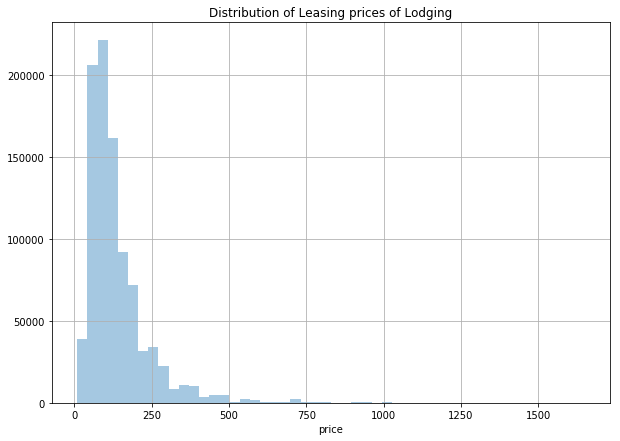

In [59]:
fig, ax = plt.subplots(figsize=(10,7));
sns.distplot(calendar['price'].dropna(),kde=False).set_title('Distribution of Leasing prices of Lodging');
ax.grid();

In [60]:
# Find price variation by day through average prices of observations on the same day
price_change = calendar.groupby('date')['price'].mean().reset_index()

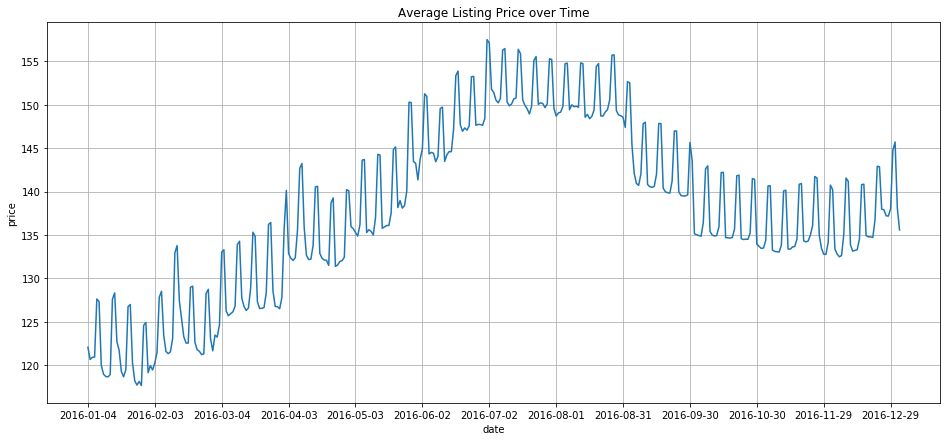

In [61]:
# line plot over year
fig, ax = plt.subplots(figsize=(16,7));
sns.lineplot(price_change['date'],price_change['price']).set_title('Average Listing Price over Time')
ax.xaxis.set_major_locator(tkr.MultipleLocator(30))
ax.grid()
plt.show()


__Findings__:<br>
1) The average listing prices increase gradually from around \$120 to \$150 from January from the beginning of the year through the summer, and the prices go downthere is rather sharp decrease after 31 Aug and maintain  and stay at a stable rangeat around $135 till the end of the year. <br>
2) The average price by the end of the year is obviously higher than the beginning of the year. Since it is not very likely for a sharp drop of listing prices for more than 10% in the early quarter of the following  next year, it seems that there is a boom in this industry over the observed period.<br>
3) Sharp peaks reported happening around 4-5 times a month are due to higher listing price in the weekends. <br>
__Therefore there is obvious seasonal trend for leasing price variation__:

### • Check occupancy rate of lodgings in popular lodging areas.

In [62]:
#filter to focus on the data under the top ten highest number of lodgings
calendar_top_nbh = calendar[calendar['neighbourhood'].isin(list_top_neighbourhood.index)]

#prepare data for ploting Distribution of Availability of Lodging for specific neigbourhood
availibility_by_nbh = calendar_top_nbh.groupby(['neighbourhood','listing_id'])['available'].sum()/calendar_top_nbh.groupby(['neighbourhood','listing_id'])['available'].count()
availibility_by_nbh = availibility_by_nbh.reset_index()


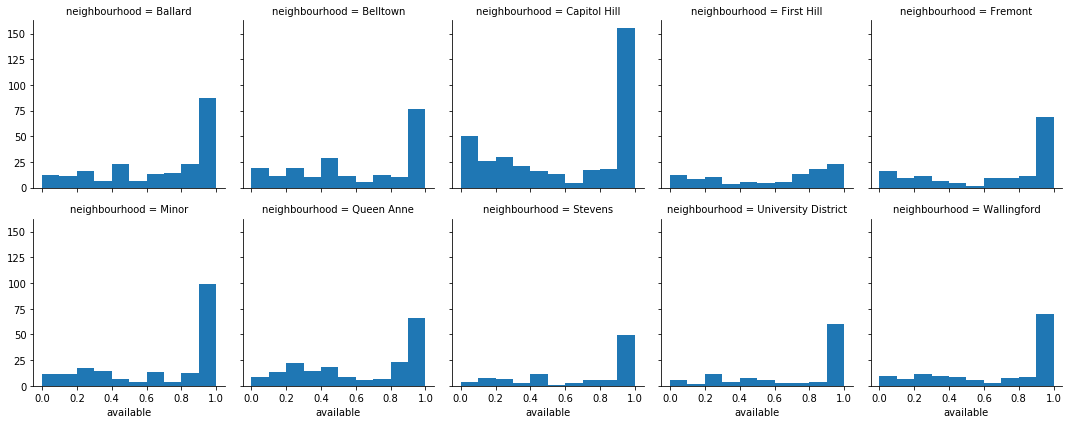

In [63]:
#Visualization
g = sns.FacetGrid(availibility_by_nbh, col="neighbourhood",col_wrap=5)
g.map(plt.hist, "available");

In [64]:
a=availibility_by_nbh[availibility_by_nbh['neighbourhood']=='Capitol Hill']['available'].count()
b=availibility_by_nbh[(availibility_by_nbh['neighbourhood']=='Capitol Hill')&(availibility_by_nbh['available']==1)]['available'].sum()
print('e.g. like Capitol Hill, of {} lodgings, {}lodgings are always available.'.format(a,b))

e.g. like Capitol Hill, of 351 lodgings, 58.0lodgings are always available.


__Findings__:<br>
__It seems not easy to start lodging buniness in Seattle__.
In most Neighbourhood, most of the lodgings are with high available rate. To start lodging business, First Hill may be the most viable options among all.

### • Observe relationship between leasing prices and other parameters, and develop predictive model to help to judge price setting.

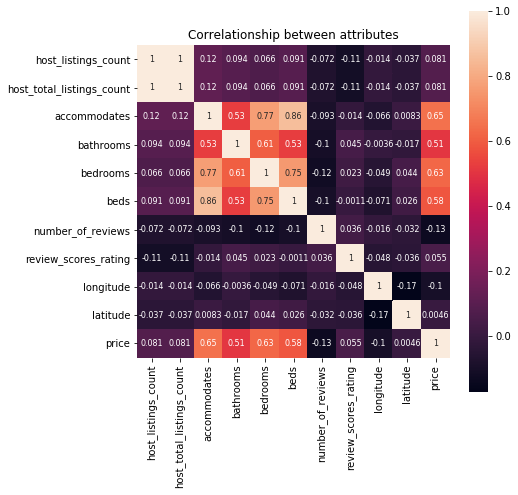

In [65]:
#Plot coefficient matrix
fig, ax = plt.subplots(figsize=(7,7));
listing_test_corr = listing_test.corr()
sns.heatmap(listing_test_corr,  annot=True,annot_kws={"size": 8} ,square = True).set_title('Correlationship between attributes');

__Findings__:<br>
1)	It makes sense that the number of guests, bathrooms, bedrooms and beds, which define the size of the flat, is mostly relevant to the change of prices.<br>
2)	Review attributes(e.g. number of reviews and review rating scores) do not affect much on the leasing prices, where number of reviews poses higher influence than review rating scores.<br>
3)	Although not a dominant factor, it is interesting that longitude has a greater effect on the listing prices than latitude, which can be explained by the geographical fact that Seattle is a spreading city along longitude with lodgings concentrating at the central part of the city.<br>


Finally, I tried to predict the listing prices by means of machine learning.

In [66]:
def predict_model(model,X_train, X_test, y_train, y_test):
    '''function to create model, provide score
    Input: model, split train and test data
    Output: trained model, RMSE, R Square score, scatterplot y_test value against prediction value'''
    clf = model
    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    y_pred = clf.predict(X_test)

    print('scores by {}'.format(str(model)))
    print('RMSE train: %.4f' %np.sqrt(mean_squared_error(y_train, y_train_pred)))
    print('RMSE test: %.4f' %np.sqrt(mean_squared_error(y_test, y_pred)))

    print('R^2 train: %.4f' %r2_score(y_train, y_train_pred))
    print('R^2 test: %.4f' %r2_score(y_test, y_pred))
    
    plt.figure(figsize=(7,7))
    plt.plot(y_test, y_pred, '.')
    plt.xlabel('y_test')
    plt.ylabel('y_pred')
    plt.title('True value VS Prediction by {}'.format(str(model)))
    plt.grid()


    return clf

scores by LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
RMSE train: 64.4412
RMSE test: 65.1260
R^2 train: 0.4756
R^2 test: 0.5283
scores by RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)
RMSE train: 21.5256
RMSE test: 61.2714
R^2 train: 0.9415
R^2 test: 0.5825
scores by SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
RMSE train: 63.2569
RMSE test: 62.3423
R^2 train: 0

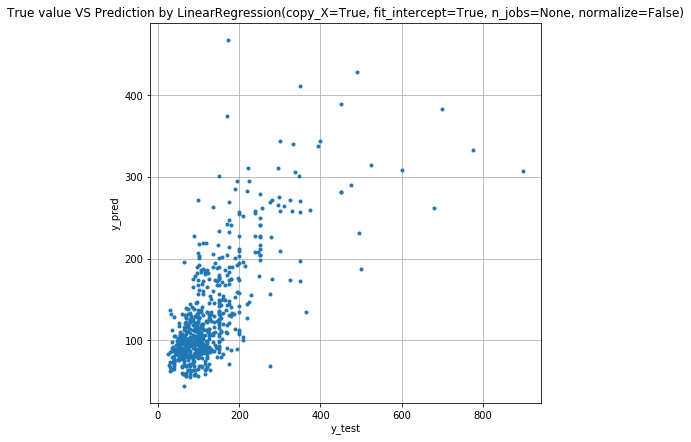

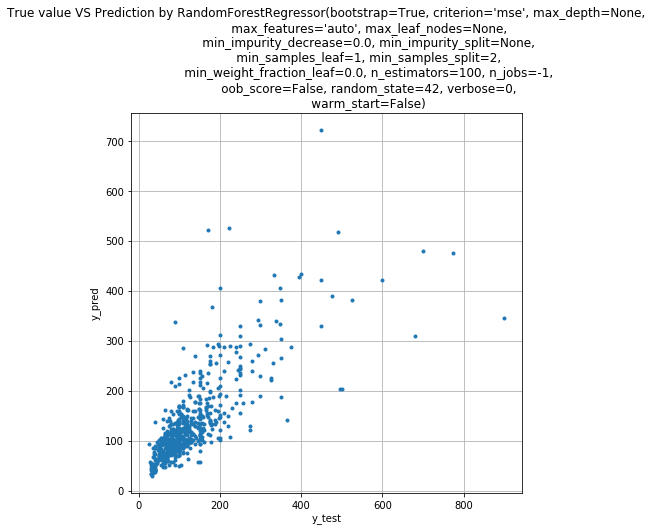

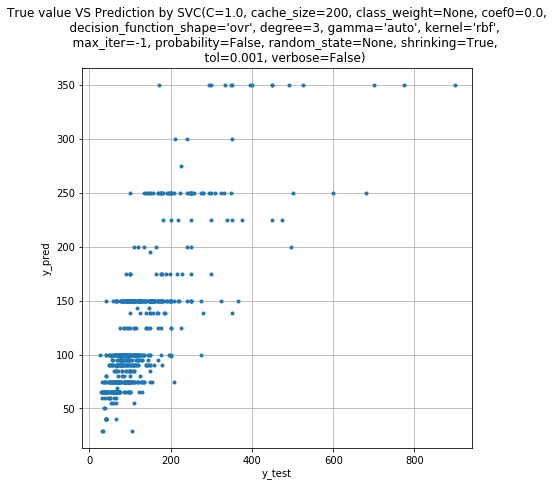

In [67]:
models = [linear_model.LinearRegression(),
          RandomForestRegressor(n_estimators=100, 
                               criterion='mse', 
                               random_state=42,n_jobs=-1),
          SVC(kernel="rbf",gamma='auto')]

for mod in models:
    predict_model(mod,X_train, X_test, y_train, y_test)

__Findings__:<br>
It seems that the performances of the three algorithms are more or less the same (except that overfitting occurs in RandomForestRegressor but it does not significantly affect the result).
Although the prediction basically can align the same direction as actual price,root mean square error of around $61-65 and R square of no more than 0.6 suggests that it is not sophisticated enough to predict prices accurately. It may be due to the fact that the factors being considered are not comprehenive enough(e.g. data on size of lodges were not considered due to too many missing values in the column, seasonal factor cannot be considered in dataset "listing" since there is no price data on each day), and quantity of data is not high enough.

## Summary of Evaluations

1. Like other popular cities for travel, Density of lodges is the highest with relatively higher leasing prices in the Central Business District, which means traffic convenience and variety of entertainment are also one of the important considerations to start lodging business in Seattle.

2. Seasonal trend for leasing prices were obvious.

3. In general it does not seem to be always a profitable business to run a lodge in Seattle since vancancy rate could be very high in some districts(Neighbourhood). Past data suggested that First Hill may be the district with highest chance to lease.

4. Factors determining leasing price of lodges are more related to size of lodges and facilities like bathrooms and bedrooms, and less related to review attributes(e.g. number of reviews and review rating scores). Because of that in order to provide more accurate prediction using machine learning we shall need more data on size of lodges and facilities.